# Marketing decisions

Our tast is to optimize the marketing expenses in Yandex.Afisha. Yandex.Afisha it is a service where you can get information about events and buy cinema and event tickets. We have data on customer activity and acquisitions and we would like to know what will enable the system to be optimized. In addition, we would like to get information about the preferred advertising source. This means that we want to know which advertising source brings maximun amount customers and on the other hand has appropriate axpenses.

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# EDA- visits 

In [2]:
#general information

visits = pd.read_csv('visits_log_us.csv')
visits.head()


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits.tail()

,Device,End Ts,Source Id,Start Ts,Uid
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


* We know that there are dates from 01/2017 to 12/2018. 
* the time displayed in hour+minutes format (withot seconds)
* The head and tail of the data look similar, there are no special values to pay attention to.
* The device column contain categorical values.

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
#lowering the column names 
visits.columns = map(str.lower, visits.columns)


In [6]:
#changing data types

#datetime type
visits['start ts'] = pd.to_datetime(visits['start ts'], format='%Y.%m.%d')
visits['end ts'] = pd.to_datetime(visits['end ts'], format='%Y.%m.%d')
                                    

#category type
visits['device'] = visits['device'].astype('category')

print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end ts     359400 non-null  datetime64[ns]
 2   source id  359400 non-null  int64         
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None


* As we mentioned eariler, we changed the data types into more appropriate type . In addition it reduces the weight of the data and this is an advantage for faster and more efficient work.(optimizing data)

In [7]:
visits.shape

(359400, 5)

* The visits table contains 359,400 rows and 5 columns .

In [8]:
visits['device'].describe()

count      359400
unique          2
top       desktop
freq       262567
Name: device, dtype: object

* The device column contains 2 unique values
* I didnt use the visits.describe() because we have only coulmns with id values so we do not receive relevant information from it

In [9]:
# a bit more information about device column
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [10]:
visits.duplicated().sum()

0

There are no duplicates values. 

# EDA - orders 

In [11]:
orders = pd.read_csv('orders_log_us.csv')

In [12]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [13]:
orders.tail()

,Buy Ts,Revenue,Uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [15]:
orders.shape

(50415, 3)

* There are no missing values
* There are 50415 rows and 3 columns

In [16]:
#lowering the column names 
orders.columns = map(str.lower, orders.columns)

#changing data types
orders['buy ts'] = pd.to_datetime(orders['buy ts'], format='%Y.%m.%d')


We changed the data type of 'buy ts' coulmn to date time 

In [17]:
orders.describe()

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


* We see the distribution of revenue column. We notice that the max value of 50% of the data is 2.5.
* there are values with zeroes in the revenue column- we need to study more..

In [18]:
orders[orders['revenue']==0].count()

buy ts     51
revenue    51
uid        51
dtype: int64

* There are 51 values with zeroes in the revenue column. Because its less than 1% from all data, right now we will not change a thing and just pay attention about it .

# EDA - expenses

In [19]:
expenses = pd.read_csv('costs_us.csv')

In [20]:
expenses.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [21]:
expenses.tail()

,source_id,dt,costs
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


In [22]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [23]:
expenses.shape

(2542, 3)

* There are no missing values
* There are 2542 rows and 3 columns
* We will change the date column to date time type

In [24]:
expenses.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


* There is a distribution of costs column. 
* 50% od the costs is acout 77.29 , the mean is 129.47
* The minimum value is 0.54 > 0 so it looks fine
* the max value is very big 

Text(0.5, 1.0, 'distribution of outliers')

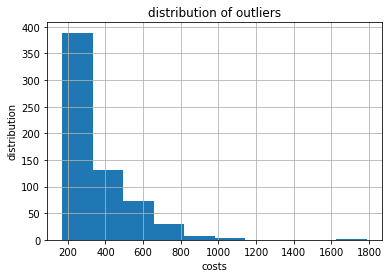

In [25]:
#cheking outliers
expenses[expenses['costs'] > 171]['costs'].hist()
plt.xlabel('costs')
plt.ylabel('distribution')
plt.title('distribution of outliers')

* It looks like ufter the value 400 there are outliers 

In [26]:
#changing data types
expenses['dt'] = pd.to_datetime(expenses['dt'], format='%Y.%m.%d')


In [27]:
visits = visits.rename(columns={'start ts':'start_ts'})
visits = visits.rename(columns={'source id':'source_id'})
orders = orders.rename(columns={'buy ts':'buy_ts'})


# calculation - product

## number people used the product every day, week and month 

In [28]:
#adding columns with day, week and month info
visits['day_st'] = visits['start_ts'].dt.date
visits['week_st'] = visits['start_ts'].dt.week
visits['month_st'] = visits['start_ts'].astype('datetime64[M]')
visits['year_st']  = visits['start_ts'].dt.year

#calculating mau wau dau
dau = visits.groupby('day_st').agg({'uid': 'nunique'})
wau = visits.groupby(['year_st', 'week_st']).agg({'uid': 'nunique'})
mau = visits.groupby(['year_st', 'month_st']).agg({'uid': 'nunique'})

In [29]:
print('DAU:', dau.mean())
print('MAU:', mau.mean())
print('WAU:', wau.mean())

DAU: uid    907.991758
dtype: float64
MAU: uid    23228.416667
dtype: float64
WAU: uid    5716.245283
dtype: float64


We calculated the average number of customers per day, week and month. The information is too general so we ask the values for each month.

<AxesSubplot:xlabel='month_st'>

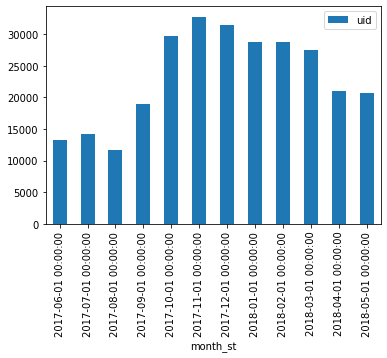

In [30]:
#number of users used the platform each month
mau = mau.reset_index()
mau.plot(kind='bar', x='month_st', y='uid')

In [31]:
#how many times each costomer visited within the data period.
visits['uid'].value_counts()

12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121947262981     343
                       ... 
13023238853810096243      1
13275209559615110952      1
10451189761655280393      1
11370115024582961201      1
15160524768967727475      1
Name: uid, Length: 228169, dtype: int64

* We used the 'start ts' to calculate the number of unique users.
* The first use date was 01/06/17 and the last- 31/05/18
* There was a pic in the number of users and than it decreased.

## sessions per day

In [32]:
#How many session are per day
sess_per_day = visits.groupby('day_st')['uid'].count()
sess_per_day.head()

day_st
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: uid, dtype: int64

* We calculated the number of session every day. When compering this to the table of unique users, we see there users use the product more than once per day 

## Lenght of each session

In [33]:
# Lenght of each session
visits['sess_len'] = (visits['end ts'] - visits['start_ts'])

#calculating mean lenth of session 
mean_session = visits['sess_len'].mean()
mean_session

Timedelta('0 days 00:10:43.025687')

10 minutes is the average time for session for all the sessions

In [34]:
#average session per day 
lenght_per_day_sess = visits.groupby('day_st')['sess_len'].mean(numeric_only=False)
lenght_per_day_sess

day_st
2017-06-01   00:11:06.320783
2017-06-02   00:10:19.840425
2017-06-03   00:10:06.958071
2017-06-04   00:09:14.309803
2017-06-05   00:10:24.450167
                   ...      
2018-05-27   00:09:16.964285
2018-05-28   00:10:32.819204
2018-05-29   00:10:29.428019
2018-05-30   00:10:40.707801
2018-05-31   00:12:19.752659
Name: sess_len, Length: 364, dtype: timedelta64[ns]

In [35]:
visits.head()

,device,end ts,source_id,start_ts,uid,day_st,week_st,month_st,year_st,sess_len
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12-01,2017,00:18:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02-01,2018,00:28:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,2017,00:00:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05-01,2018,00:24:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12-01,2017,00:00:00


In [36]:

device_sess = visits.groupby(['month_st', 'device'])['sess_len'].mean(numeric_only=False).reset_index()
device_sess['sess_len'] = device_sess['sess_len'].dt.seconds
device_sess

,month_st,device,sess_len
0,2017-06-01,desktop,647
1,2017-06-01,touch,459
2,2017-07-01,desktop,666
3,2017-07-01,touch,440
4,2017-08-01,desktop,645
5,2017-08-01,touch,413
6,2017-09-01,desktop,657
7,2017-09-01,touch,436
8,2017-10-01,desktop,668
9,2017-10-01,touch,474


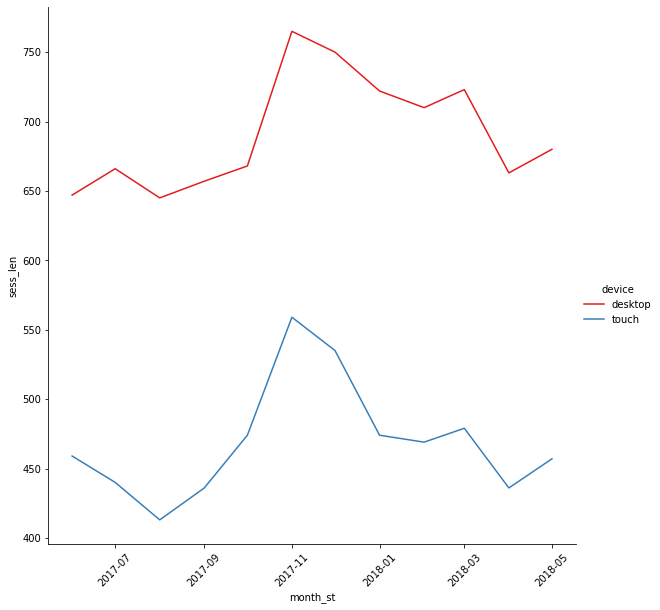

In [37]:
# session per device 
chart = (sns.relplot(x="month_st", y="sess_len", 
                     hue="device",
            height=8,
           kind="line", data=device_sess, palette='Set1',  legend="full")
         )
chart.set_xticklabels(rotation=45)

We compered the lenght of session between devices. It semms that desktop session are much longer!

## how often do the users come back

In [38]:

visits['start_ts'] = pd.to_datetime(visits['start_ts'])
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.merge(first_activity_date,on='uid')
visits

visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')

visits_grouped_by_cohorts = (
    visits.groupby(['first_activity_month','month_st'])
    .agg({'uid':'nunique'})
)
print(visits_grouped_by_cohorts.head())

                                   uid
first_activity_month month_st         
2017-06-01           2017-06-01  13259
                     2017-07-01   1043
                     2017-08-01    713
                     2017-09-01    814
                     2017-10-01    909


In [39]:
visits['cohort_lifetime'] = visits['start_ts'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype(int)

In [40]:
cohorts = (
    visits.groupby(['first_activity_month','cohort_lifetime'])
    .agg({'uid':'nunique'}).reset_index()
)

In [41]:
initial_users_count = (
    cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
)
print(initial_users_count)

   first_activity_month    uid
0            2017-06-01  13259
12           2017-07-01  12856
24           2017-08-01   9749
34           2017-09-01  16704
43           2017-10-01  25256
51           2017-11-01  27248
58           2017-12-01  24882
64           2018-01-01  21945
69           2018-02-01  22197
73           2018-03-01  20588
77           2018-04-01  15709
80           2018-05-01  14207


In [42]:
initial_users_count = (
    initial_users_count.rename(columns={'uid':'cohort_users'})
)

In [43]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

In order to calculate the retention we first had to find the date on which each customer started his activity. Then calculate the time elapsed from the beginning of each customer's activity to the current activity (so we can compare customers to the same time period). Then calculate the amount of customers by date. Once we have put the information together we can calculate how long it takes for each customer to return to activity

In [44]:
cohorts['retention1'] = cohorts['uid']/cohorts['cohort_users']

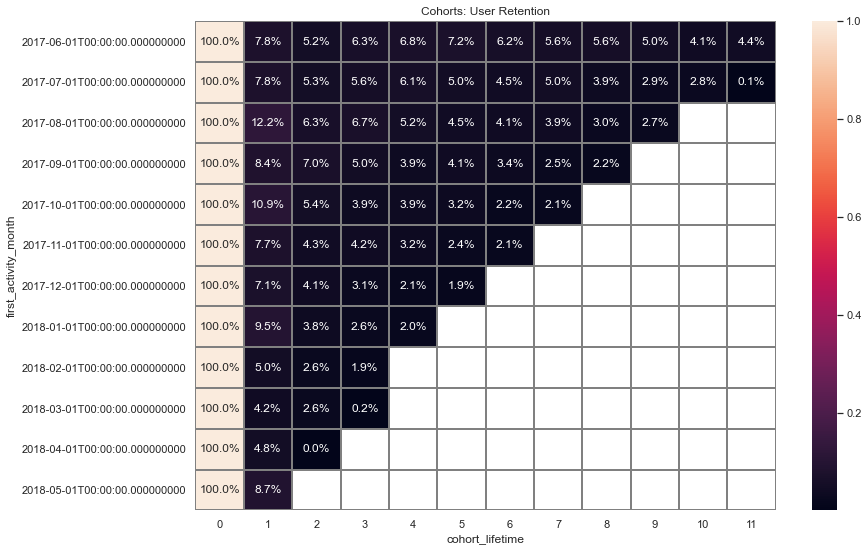

In [45]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention1',aggfunc='sum')


sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

It seems that the retantion rate is low. After purchasing once, most users tend to leave.

In [46]:
#average retention rate



# calculation - orders

In [47]:
#looking for the first session for each user
first_sess_date = visits.groupby('uid')['start_ts'].min()
#changing date column name
first_sess_date.name = 'first_session_date'


In [48]:
#looking for the first order for each user
first_order_date = orders.groupby('uid')['buy_ts'].min().reset_index()
#changing date column name
first_order_date = first_order_date.rename(columns={'buy_ts':'first_order_date'})

In [49]:
first_activ = first_order_date.merge(first_sess_date, on='uid')
first_activ

,uid,first_order_date,first_session_date
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00
36520,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00
36521,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00


* We calculated the first session day by user. Then, We calculated the first order by user. Finally, we combined these tables .  Now we could find the time it takes to start buying. 

In [50]:
#When do people start buying
#time long from registration to purchase
first_activ['day_until_buy'] = (
    first_activ['first_order_date'].dt.date - 
    first_activ['first_session_date'].dt.date
)



In [51]:
first_activ['day_until_buy'] = first_activ['day_until_buy'] / np.timedelta64(1, 'D')


In [52]:
def group_time_buy(day_until_buy):
    if day_until_buy == 0:
        return '0'
    if 0 < day_until_buy <= 7:
        return '7'
    if 7 < day_until_buy <= 14:
        return '14'
    if 14 < day_until_buy <= 30:
        return '30'
    else:
        return '30+'

first_activ['group_time_buy'] = first_activ['day_until_buy'].apply(group_time_buy)     
    

<AxesSubplot:ylabel='uid'>

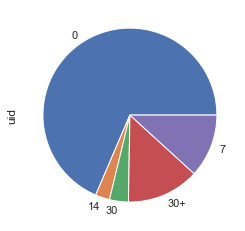

In [53]:
first_activ.groupby('group_time_buy')['uid'].count().plot(kind='pie')

I've changed the approach to the question .When grouping by time convertion we see the share of each group. Most people purchase in the same day they visited the first time .
We will show the data by sources so we can see which of them is the recommended source.

In [54]:
#adding the source serie to the first actic table
sources = visits[['uid', 'source_id']]
first_activ = first_activ.merge(sources, how='left', on='uid')
first_activ

,uid,first_order_date,first_session_date,day_until_buy,group_time_buy,source_id
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,107.0,30+,2
1,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,107.0,30+,2
2,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,107.0,30+,2
3,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0,0,10
4,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0,0,10
...,...,...,...,...,...,...
97389,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00,103.0,30+,5
97390,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00,103.0,30+,4
97391,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00,103.0,30+,1
97392,18446167067214817906,2017-10-17 10:16:00,2017-10-17 10:05:00,0.0,0,5


<AxesSubplot:xlabel='source_id', ylabel='uid'>

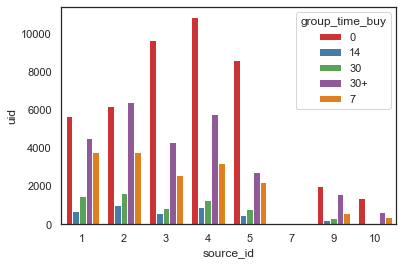

In [55]:
day_by_source = first_activ.groupby(['source_id', 'group_time_buy'])['uid'].count().reset_index()

sns.barplot(x="source_id", y="uid", data=day_by_source, hue='group_time_buy'
            , palette='Set1')



We see in all the sources a similar behavior in which most customers buy on the first day but many users buy even after 30 days have passed.

In addition it seems that there are many more customers who came from sources 1-5, Compared to the rest.


## what is the average purchase size

In [56]:

cnt_orders = orders['uid'].count()
cnt_users = orders['uid'].nunique()
revenue = orders['revenue'].sum()


print('number of orders in a given period:', cnt_orders)
print('number of users in a given period:', cnt_users)
print('the total revenue for a givem period:', revenue)

number of orders in a given period: 50415
number of users in a given period: 36523
the total revenue for a givem period: 252057.19999999998


In [57]:
purchase_size = revenue / cnt_users
print('the average purchase size is:', purchase_size)

the average purchase size is: 6.9013279303452615


##  orders users make during a given perion of time

In [58]:
visits

,device,end ts,source_id,start_ts,uid,day_st,week_st,month_st,year_st,sess_len,first_activity_date,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12-01,2017,00:18:00,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02-01,2018,00:28:00,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,2017,00:00:00,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05-01,2018,00:24:00,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,10,2018-03-01,2018,00:28:00,2018-03-09 20:05:00,2018-03-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-23,17,2018-04-01,2018,00:08:00,2018-04-23 21:11:00,2018-04-01,0
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-11-08,45,2017-11-01,2017,00:00:00,2017-11-08 13:39:00,2017-11-01,0
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017-07-31,31,2017-07-01,2017,00:18:00,2017-07-31 12:13:00,2017-07-01,1
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018-03-20,12,2018-03-01,2018,00:14:00,2018-03-20 15:11:00,2018-03-01,0


In [59]:

orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


The goal id to calculate the number of orders for each customer in a certain period of time and in addition to consider the source. We combined the orders and visit tables and then filtered it, so we would see only the sources from which the invitations were made. Therefore we compared the column Time from orders and time of start session.

In [60]:
orders.head()
order_source = orders[['buy_ts', 'uid', 'revenue']]


first_activ_source = visits[['uid', 'source_id', 'day_st', 'first_activity_date']]

order_source = (
    order_source.merge(first_activ_source, on='uid')
)

order_source['buy_ts'] = order_source['buy_ts'].astype('datetime64[M]')
order_source['first_activity_date'] = order_source['first_activity_date'].astype('datetime64[M]')
order_source = order_source.query('buy_ts == day_st')
order_source.head()

,buy_ts,uid,revenue,source_id,day_st,first_activity_date
0,2017-06-01,10329302124590727494,17.00,1,2017-06-01,2017-06-01
1,2017-06-01,11627257723692907447,0.55,2,2017-06-01,2017-06-01
2,2017-06-01,17903680561304213844,0.37,2,2017-06-01,2017-06-01
3,2017-06-01,16109239769442553005,0.55,2,2017-06-01,2017-06-01
4,2017-06-01,14200605875248379450,0.37,3,2017-06-01,2017-06-01


In [61]:
order_source.pivot_table(index='first_activity_date', columns='buy_ts', values='uid', aggfunc='count').round(decimals=0).fillna(0)

buy_ts,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-05-01
first_activity_date,,,,,,,,,,,
2017-06-01,262.0,54.0,233.0,129.0,77.0,181.0,361.0,10.0,183.0,245.0,10.0
2017-07-01,0.0,76.0,57.0,23.0,5.0,4.0,32.0,8.0,9.0,24.0,1.0
2017-08-01,0.0,0.0,52.0,27.0,11.0,90.0,66.0,2.0,64.0,6.0,2.0
2017-09-01,0.0,0.0,0.0,71.0,23.0,11.0,85.0,5.0,17.0,36.0,1.0
2017-10-01,0.0,0.0,0.0,0.0,126.0,49.0,21.0,7.0,44.0,19.0,13.0
2017-11-01,0.0,0.0,0.0,0.0,0.0,153.0,123.0,11.0,154.0,122.0,9.0
2017-12-01,0.0,0.0,0.0,0.0,0.0,0.0,144.0,41.0,11.0,111.0,27.0
2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,148.0,177.0,48.0,16.0
2018-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,90.0,8.0


## number of orders per user


In [62]:
purchase_cnt = cnt_orders / cnt_users
print('the average purchse for each costomer is:', purchase_cnt)

the average purchse for each costomer is: 1.3803630588943954


In [63]:
#combining activity table with first order date table
orders = orders.merge(first_order_date,on='uid')
#looking for the month of the dates
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['buy_ts'] = orders['buy_ts'].astype('datetime64[M]')
print(orders.head())

      buy_ts  revenue                   uid    first_order_date  \
0 2017-06-01    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_order_month  
0        2017-06-01  
1        2017-06-01  
2        2017-06-01  
3        2017-06-01  
4        2017-06-01  


In [64]:
#pivot table -number purchases of users for each month ordered by the first order month 
orders.pivot_table(index='first_order_month',
columns='buy_ts',
values='uid',
aggfunc='nunique')

buy_ts,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,NaN
2017-07-01,NaN,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,NaN
2017-08-01,NaN,NaN,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,NaN
2017-09-01,NaN,NaN,NaN,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4383.0,146.0,103.0,97.0,50.0,63.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3373.0,114.0,83.0,43.0,45.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3651.0,118.0,58.0,39.0,NaN


* We see that most customers who made a first order did not return to make any more orders. But most of the users who kept making second-time orders also kept ordering more. 

In [65]:
#HOW MUCH MONEY DO THEY BRING 

profit = .4
orders['gross_profit'] = orders['revenue'] * profit

orders_grouped_by_cohorts = (
    orders.groupby(['first_order_month','buy_ts'])
    .agg({'gross_profit':'sum','uid':'nunique'}).reset_index()
)
print(orders_grouped_by_cohorts.head())

  first_order_month     buy_ts  gross_profit   uid
0        2017-06-01 2017-06-01      3822.996  2023
1        2017-06-01 2017-07-01       392.728    61
2        2017-06-01 2017-08-01       354.136    50
3        2017-06-01 2017-09-01       772.520    54
4        2017-06-01 2017-10-01       827.432    88


We used 40% gross margin because we did not have enough information to calculate the precise value. Then we built a table where we see the number of users and the total revenue by month of each purchase and first purchase month.

In [66]:
#ltv calculaion
orders_grouped_by_cohorts['ltv'] = (
    orders_grouped_by_cohorts['gross_profit'] / 
    orders_grouped_by_cohorts['uid']
)

In [67]:
#lifetime calculation

orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['buy_ts'] - 
    orders_grouped_by_cohorts['first_order_month']
)
orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
)
orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
)
orders_grouped_by_cohorts['first_order_month'] = (
    orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m')
)

The cohort lifetime is the difference between each particular buying month and the first buying month. This way you can group each customer according to this difference and see the changes between the customers from the first purchase to each of their additional purchases.

In [68]:
ltv_pivot = (
    orders_grouped_by_cohorts
    .pivot_table(index='first_order_month',columns='cohort_lifetime'
                 ,values='ltv',aggfunc='mean')
)
ltv_pivot.head()

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.889766,6.438164,7.082720,14.305926,9.402636,8.883104,12.404774,10.013277,7.718276,10.893422,10.272533,3.92166
2017-07,2.404087,4.958538,8.414386,4.314437,2.775265,3.158737,2.568444,2.797128,2.952857,5.144727,4.605538,NaN
2017-08,2.110607,4.459517,4.740528,4.873182,6.768500,4.855625,3.848133,5.044182,8.428000,3.322968,NaN,NaN
2017-09,2.257812,8.875354,5.378080,55.467676,7.952615,10.438000,10.974848,6.784541,4.417860,NaN,NaN,NaN
2017-10,2.001493,4.514971,2.701301,2.965261,2.829118,2.902056,2.629286,2.991881,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'ltv'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

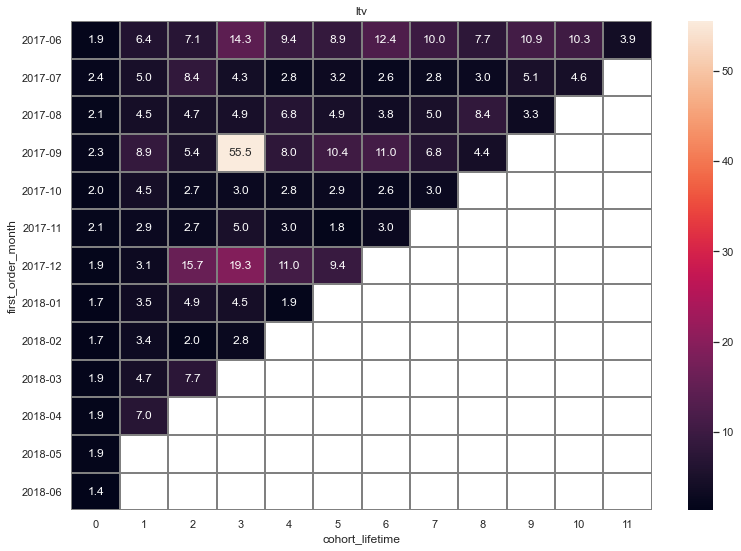

In [69]:
plt.figure(figsize=(13, 9))
plt.title('ltv')
sns.heatmap(ltv_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

* We see in Hitmap the changes in LTV each month compared to the first month. Our values are the average gross profit per customer per month

# expenses calculation

In [70]:
#HOW MUCH MONEY WAS SPENT OVERALL? 
costs = expenses['costs'].sum()
costs

329131.62

In [71]:
orders['revenue'].sum()

252057.2

The total revenue:252057.19 . The total costs:329131.62 .

In [72]:
#HOW MUCH MONEY WAS SPENT PER SOURCE?
source_costs = (
    expenses.groupby('source_id')
    .agg({'costs':'sum'})
)
source_costs

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


We see the total expenses from each of the sources. Source number 4 has the highest of the sources

## how much money was spent over time 

In [73]:

expenses['dt'] = expenses['dt'].dt.strftime('%Y.%m.%d')

In [74]:
expenses.head()

,source_id,dt,costs
0,1,2017.06.01,75.20
1,1,2017.06.02,62.25
2,1,2017.06.03,36.53
3,1,2017.06.04,55.00
4,1,2017.06.05,57.08


In [75]:
expenses['dtM'] = expenses['dt'].astype('datetime64[M]')
expenses_2017 = (
    expenses.query('"2017.12.31">dt>"2017.01.01"')
    .groupby(['source_id', 'dtM'])['costs'].sum()
    .reset_index().sort_values(by='dtM')
)
expenses_2018 = (
    expenses.query('"2018.12.31">dt>"2018.01.01"')
    .groupby(['source_id', 'dtM'])['costs'].sum()
    .reset_index().sort_values(by='dtM')
)

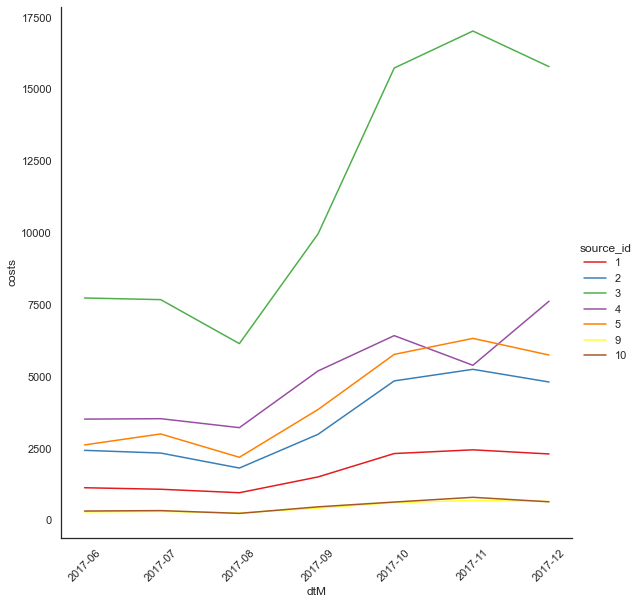

In [76]:


chart1 = (sns.relplot(x="dtM", y="costs", hue="source_id",
            height=8,
            kind="line", data=expenses_2017, palette='Set1',  legend="full")
         )
sns.set_style("dark")
chart1.set_xticklabels(rotation=45)


<Figure size 936x720 with 0 Axes>

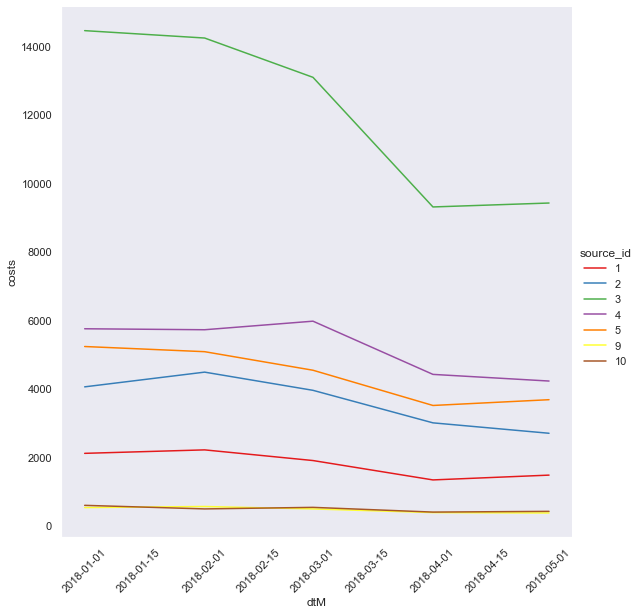

In [77]:
plt.figure(figsize=(13,10))
chart2 = (sns.relplot(x="dtM", y="costs", hue="source_id",
            height=8,
            kind="line", data=expenses_2018, palette='Set1',  legend="full")
         )
sns.set_style("dark")
chart2.set_xticklabels(rotation=45)


<Figure size 936x720 with 0 Axes>

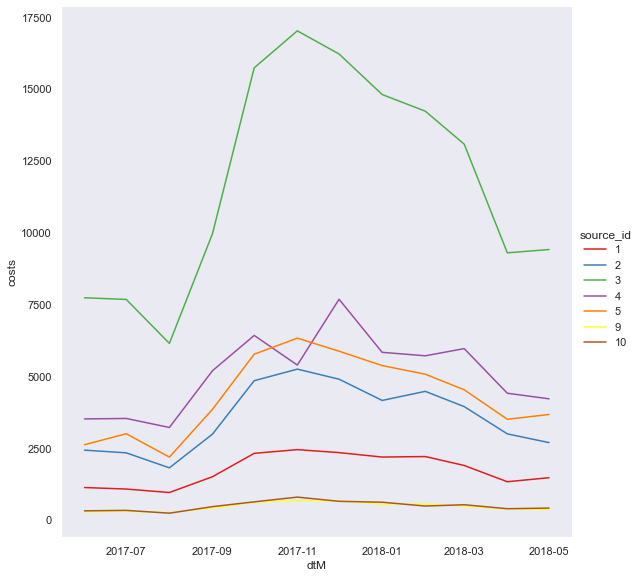

In [78]:
expenses_group = (
    expenses.groupby(['source_id', 'dtM'])['costs'].sum()
    .reset_index().sort_values(by='dtM')
)
    
    
plt.figure(figsize=(13,10))
chart3 = (sns.relplot(x="dtM", y="costs", hue="source_id",
            height=8,
            kind="line", data=expenses_group, palette='Set1',  legend="full")
         )
sns.set_style("dark")
chart2.set_xticklabels(rotation=45)

It is interesting to see that the costs for all sources (except for source number 3) were fixed costs compared to source number ten: costs went up a lot and then went down.


source 3 is the most expensive . We would like to see in the future what income it brought to see if it pays off

##  HOW MUCH DID COSTOMERS ACQUISITION FROM EACH OF THE SOURCES COST?



* CAC = costs / number of clients
* We grouped the visits and the expenses tables by source and than cakculated the cac value 

* LTV = mean gross profit of each clieant
* ROI = is the deviation of profit of each costomer by cost of each costomer

## ltv, cac and romi calculation by month  

In [79]:
visits.head()

,device,end ts,source_id,start_ts,uid,day_st,week_st,month_st,year_st,sess_len,first_activity_date,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12-01,2017,00:18:00,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02-01,2018,00:28:00,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,2017,00:00:00,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05-01,2018,00:24:00,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,10,2018-03-01,2018,00:28:00,2018-03-09 20:05:00,2018-03-01,0


In [80]:
expenses.head()

,source_id,dt,costs,dtM
0,1,2017.06.01,75.20,2017-06-01
1,1,2017.06.02,62.25,2017-06-01
2,1,2017.06.03,36.53,2017-06-01
3,1,2017.06.04,55.00,2017-06-01
4,1,2017.06.05,57.08,2017-06-01


In [81]:
expenses['month'] = expenses['dt'].astype('datetime64[M]')

activity is the table with merged data from vists and orders tables and ordereg by dates of users first activity. We can't use the whole merged table because each user may have more than one source so the revenue will increase .

In [82]:
# we ask for the first order of each user
first_orders = order_source.groupby(['uid']).agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,12695041396440380,2017-09-01
1,24676009422219357,2018-03-01
2,30409292159988525,2017-12-01
3,37484889130486558,2017-11-01
4,47167690271488015,2018-02-01


In [83]:
#new table with number of unique user in each month
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,121
1,2017-07-01,63
2,2017-08-01,55
3,2017-09-01,84
4,2017-10-01,130


In [84]:
#data with all users activity (orders and first order for each user)
orders_ = pd.merge(order_source,first_orders, on='uid')
orders_.head()

,buy_ts,uid,revenue,source_id,day_st,first_activity_date,first_order_month
0,2017-06-01,10329302124590727494,17.00,1,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01,11627257723692907447,0.55,2,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01,17903680561304213844,0.37,2,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01,16109239769442553005,0.55,2,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01,14200605875248379450,0.37,3,2017-06-01,2017-06-01,2017-06-01


In [85]:
#total revenue by dates
cohorts = orders_.groupby(['first_order_month','buy_ts']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,buy_ts,revenue
0,2017-06-01,2017-06-01,1194.92
1,2017-06-01,2017-07-01,94.17
2,2017-06-01,2017-08-01,42.34
3,2017-06-01,2017-09-01,10.39
4,2017-06-01,2017-10-01,134.35


In [86]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,buy_ts,revenue
0,2017-06-01,121,2017-06-01,1194.92
1,2017-06-01,121,2017-07-01,94.17
2,2017-06-01,121,2017-08-01,42.34
3,2017-06-01,121,2017-09-01,10.39
4,2017-06-01,121,2017-10-01,134.35


we have now two tables : 
* report - total number of users and total sum of revenue by dates
* orders_ - total activity of users

In [87]:
margin_rate = .4

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['buy_ts'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,buy_ts,revenue,gp,age
0,2017-06-01,121,2017-06-01,1194.92,477.968,0
1,2017-06-01,121,2017-07-01,94.17,37.668,1
2,2017-06-01,121,2017-08-01,42.34,16.936,2
3,2017-06-01,121,2017-09-01,10.39,4.156,3
4,2017-06-01,121,2017-10-01,134.35,53.740,4


We do not have a margin rate to work with, so we have to set the margin rate by ourselves. For e-commerce business it varies from 20% to 50% . We choose to work with 40% (closer to average)

In [88]:
#ltv for users from the first activity
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round()

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,11
first_order_month,,,,,,,,,,,
2017-06-01,4.0,0,0,0,0,1,4,,3,3,0
2017-07-01,4.0,7,1,0,1,,0,0,1,,
2017-08-01,8.0,4,1,0,0,,0,0,,,
2017-09-01,5.0,0,1,2,,,3,,0,,
2017-10-01,2.0,,4,,0,,,,,,
2017-11-01,5.0,1,0,1,0,,0,,,,
2017-12-01,23.0,0,2,1,,0,,,,,
2018-01-01,2.0,0,0,,,,,,,,
2018-02-01,3.0,0,,,,,,,,,


In [89]:
ltv_201706 = output.loc['2017-06-01'].sum()
ltv_201706

15.0

In [90]:
# getting the necessary cohort
cohort_201706 = report[report['first_order_month'] == '2017-06-01']

In [91]:
# calculating costs for the cohort month
costs_201706 = expenses[expenses['month'] == '2017-06-01']['costs'].sum()

In [92]:
cohort_201706

,first_order_month,n_buyers,buy_ts,revenue,gp,age,ltv
0,2017-06-01,121,2017-06-01,1194.92,477.968,0,3.950149
1,2017-06-01,121,2017-07-01,94.17,37.668,1,0.311306
2,2017-06-01,121,2017-08-01,42.34,16.936,2,0.139967
3,2017-06-01,121,2017-09-01,10.39,4.156,3,0.034347
4,2017-06-01,121,2017-10-01,134.35,53.740,4,0.444132
5,2017-06-01,121,2017-11-01,404.32,161.728,5,1.336595
6,2017-06-01,121,2017-12-01,1277.51,511.004,6,4.223174
7,2017-06-01,121,2018-02-01,823.09,329.236,8,2.720959
8,2017-06-01,121,2018-03-01,944.46,377.784,9,3.122182
9,2017-06-01,121,2018-05-01,66.00,26.400,11,0.218182


In [93]:
n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706   = output.loc['2017-06-01'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706)

CAC = 148.88429752066116
LTV = 15.0


In [94]:
# calculating the costs per month
monthly_costs = expenses.groupby(['month']).sum()
monthly_costs.head()

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


In [95]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,buy_ts,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,121,2017-06-01,1194.92,477.968,0,3.950149,1020,18015.0,148.884298
1,2017-06-01,121,2017-07-01,94.17,37.668,1,0.311306,1020,18015.0,148.884298
2,2017-06-01,121,2017-08-01,42.34,16.936,2,0.139967,1020,18015.0,148.884298
3,2017-06-01,121,2017-09-01,10.39,4.156,3,0.034347,1020,18015.0,148.884298
4,2017-06-01,121,2017-10-01,134.35,53.740,4,0.444132,1020,18015.0,148.884298


In [96]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,11
first_order_month,,,,,,,,,,,
2017-06-01,0.03,0.03,0.03,0.03,0.03,0.04,0.07,NaN,0.09,0.11,0.11
2017-07-01,0.01,0.04,0.04,0.04,0.05,NaN,0.05,0.05,0.05,NaN,NaN
2017-08-01,0.03,0.04,0.05,0.05,0.05,NaN,0.05,0.05,NaN,NaN,NaN
2017-09-01,0.02,0.02,0.02,0.03,NaN,NaN,0.04,NaN,0.04,NaN,NaN
2017-10-01,0.01,NaN,0.02,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,0.02,0.03,0.03,0.03,0.03,NaN,0.03,NaN,NaN,NaN,NaN
2017-12-01,0.12,0.12,0.14,0.14,NaN,0.14,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.03,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
output.cumsum(axis=1).mean(axis=0)

age
0     0.030289
1     0.040027
2     0.040219
3     0.053925
4     0.036881
5     0.092173
6     0.047283
7     0.049423
8     0.058813
9     0.109366
11    0.110831
dtype: float64

In [104]:
report_.head()

,first_order_month,n_buyers,buy_ts,revenue,gp,age,ltv,source_id,costs,cac,romi
0,2017-06-01,121,2017-06-01,1194.92,477.968,0,3.950149,1020,18015.0,148.884298,0.026532
1,2017-06-01,121,2017-07-01,94.17,37.668,1,0.311306,1020,18015.0,148.884298,0.002091
2,2017-06-01,121,2017-08-01,42.34,16.936,2,0.139967,1020,18015.0,148.884298,0.000940
3,2017-06-01,121,2017-09-01,10.39,4.156,3,0.034347,1020,18015.0,148.884298,0.000231
4,2017-06-01,121,2017-10-01,134.35,53.740,4,0.444132,1020,18015.0,148.884298,0.002983


## ltv, cac and romi calculation per source 

In [99]:

by_source_order = order_source.groupby('source_id').agg({'uid':'nunique', 'revenue':'sum'})
by_source_order['ltv'] = by_source_order['revenue'] / by_source_order['uid']
by_source_order

,uid,revenue,ltv
source_id,,,
1,283,10398.35,36.743286
2,265,16415.71,61.946075
3,422,2760.47,6.541398
4,394,2808.39,7.127893
5,303,4848.79,16.002607
9,47,210.84,4.485957
10,37,124.49,3.364595


In [100]:
by_source_costs = expenses.groupby('source_id')['costs'].sum().reset_index()
by_source_costs

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [101]:
by_source_order

,uid,revenue,ltv
source_id,,,
1,283,10398.35,36.743286
2,265,16415.71,61.946075
3,422,2760.47,6.541398
4,394,2808.39,7.127893
5,303,4848.79,16.002607
9,47,210.84,4.485957
10,37,124.49,3.364595


In [102]:
by_source_costs = by_source_costs.merge(by_source_order, on='source_id')

In [103]:
by_source_costs['cac'] = by_source_costs['costs'] / by_source_costs['uid']
by_source_costs['romi'] = by_source_costs['ltv'] / by_source_costs['cac']
by_source_costs

,source_id,costs,uid,revenue,ltv,cac,romi
0,1,20833.27,283,10398.35,36.743286,73.615795,0.499122
1,2,42806.04,265,16415.71,61.946075,161.532226,0.383491
2,3,141321.63,422,2760.47,6.541398,334.885379,0.019533
3,4,61073.60,394,2808.39,7.127893,155.009137,0.045984
4,5,51757.10,303,4848.79,16.002607,170.815512,0.093684
5,9,5517.49,47,210.84,4.485957,117.393404,0.038213
6,10,5822.49,37,124.49,3.364595,157.364595,0.021381


We tested the efficiency of the various sources, by comparing ROMI values between each of the source. The results of the romi calculation showed a low ratio between CAC and LTV. This means that the costs are higher than the revenue (per customer). It seems that there is no source worth investing in more than others. In addition, the company needs to reconsider how to bring in new customers but also leave them for a long time which as we have seen most customers leave after the first purchase.